In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
customers = pd.read_csv(r"C:\SNU\Sem 7\z_assignment\Customers.csv")
transactions = pd.read_csv(r"C:\SNU\Sem 7\z_assignment\Transactions.csv")

In [3]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [4]:
# Preprocess the Customers dataset
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['Region'] = LabelEncoder().fit_transform(customers['Region'])

In [5]:
# Aggregate Transaction Data
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transaction_summary = transactions.groupby('CustomerID').agg(
    total_transactions=('TransactionID', 'count'),
    total_spent=('TotalValue', 'sum'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

In [6]:
# Merge Customers and Transaction Summary
data = pd.merge(customers, transaction_summary, on='CustomerID', how='inner')

In [7]:
data

,CustomerID,CustomerName,Region,SignupDate,total_transactions,total_spent,avg_transaction_value
0,C0001,Lawrence Carroll,3,2022-07-10,5,3354.52,670.904000
1,C0002,Elizabeth Lutz,0,2022-02-13,4,1862.74,465.685000
2,C0003,Michael Rivera,3,2024-03-07,4,2725.38,681.345000
3,C0004,Kathleen Rodriguez,3,2022-10-09,8,5354.88,669.360000
4,C0005,Laura Weber,0,2022-08-15,3,2034.24,678.080000
...,...,...,...,...,...,...,...
194,C0196,Laura Watts,1,2022-06-07,4,4982.88,1245.720000
195,C0197,Christina Harvey,1,2023-03-21,3,1928.65,642.883333
196,C0198,Rebecca Ray,1,2022-02-27,2,931.83,465.915000
197,C0199,Andrea Jenkins,1,2022-12-03,4,1979.28,494.820000


In [8]:
# Select Features for Clustering
features = data[['Region', 'total_transactions', 'total_spent', 'avg_transaction_value']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
# Apply K-Means Clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
# Evaluate Clustering
db_index = davies_bouldin_score(scaled_features, data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.1575385765743047


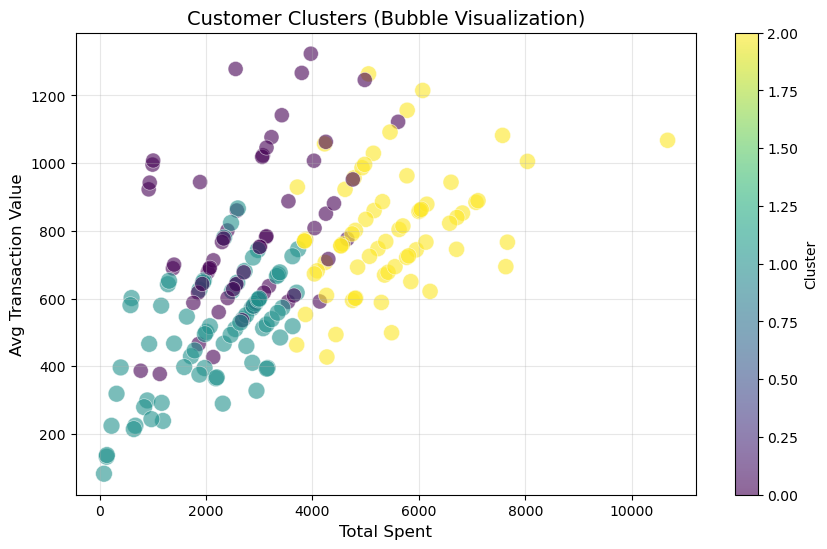

In [20]:
# # Visualize Clusters
# sns.scatterplot(
#     x=data['total_spent'], 
#     y=data['avg_transaction_value'], 
#     hue=data['Cluster'], 
#     palette='viridis'
# )
# plt.title('Customer Clusters')
# plt.xlabel('Total Spent')
# plt.ylabel('Avg Transaction Value')
# plt.legend(title='Cluster')
# plt.show()

# Visualize Clusters as Bubble Clusters
plt.figure(figsize=(10, 6))

# Assign size to clusters based on their total count (or any relevant metric)
sizes = data['Cluster'].map(data['Cluster'].value_counts()) * 2  # Scale for better visibility

scatter = plt.scatter(
    x=data['total_spent'], 
    y=data['avg_transaction_value'], 
    c=data['Cluster'], 
    s=sizes,  # Bubble size
    cmap='viridis', 
    alpha=0.6,  # Transparency for better visibility
    edgecolors='w',  # Add white edges to bubbles
    linewidth=0.5
)

# Adding titles and labels
plt.title('Customer Clusters (Bubble Visualization)', fontsize=14)
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Avg Transaction Value', fontsize=12)

# Add a colorbar for cluster identification
plt.colorbar(scatter, label='Cluster')

# Add grid for better readability
plt.grid(alpha=0.3)

plt.show()


In [12]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap


In [13]:
# Dimensionality Reduction (PCA for 2D visualization)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

In [21]:

# Apply KMeans to reduced features
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(reduced_features)


C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
# Create a grid for decision boundaries
x_min, x_max = reduced_features[:, 0].min() - 1, reduced_features[:, 0].max() + 1
y_min, y_max = reduced_features[:, 1].min() - 1, reduced_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]

In [23]:
# Predict clusters for grid points
Z = kmeans.predict(grid_points)
Z = Z.reshape(xx.shape)

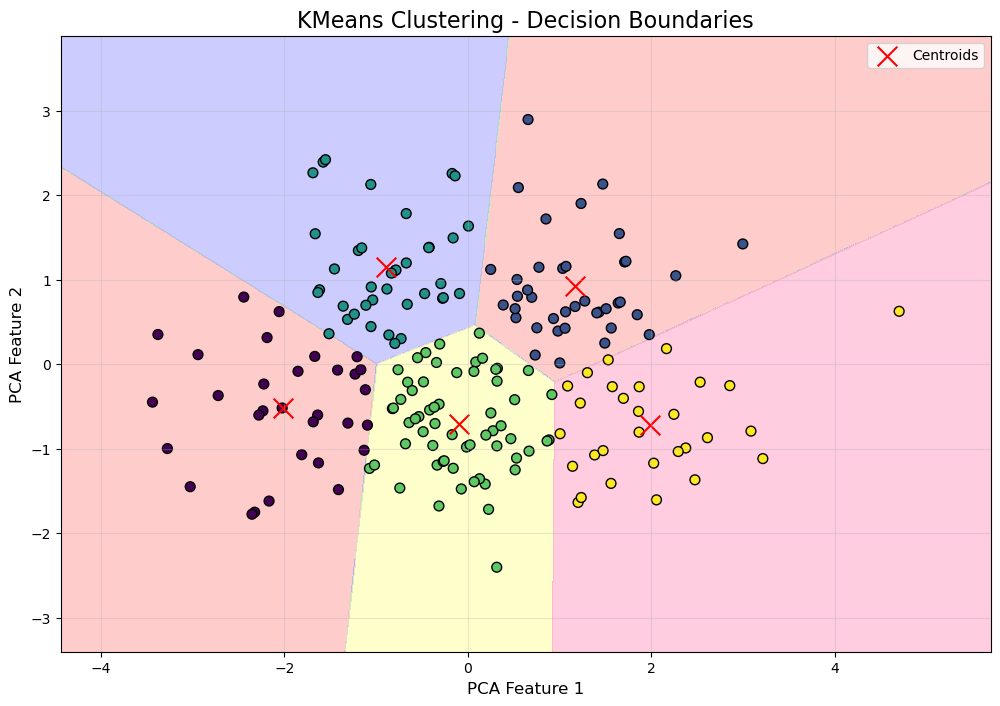

In [24]:
# Visualize Decision Boundaries
plt.figure(figsize=(12, 8))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#FFAACC'])  # Colors for zones
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

# Plot data points
plt.scatter(
    reduced_features[:, 0], 
    reduced_features[:, 1], 
    c=data['Cluster'], 
    s=50, 
    edgecolor='k', 
    cmap='viridis'
)

# Plot cluster centers (transformed to 2D using PCA)
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    c='red', 
    s=200, 
    marker='x', 
    label='Centroids'
)

# Add titles and labels
plt.title('KMeans Clustering - Decision Boundaries', fontsize=16)
plt.xlabel('PCA Feature 1', fontsize=12)
plt.ylabel('PCA Feature 2', fontsize=12)
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.show()

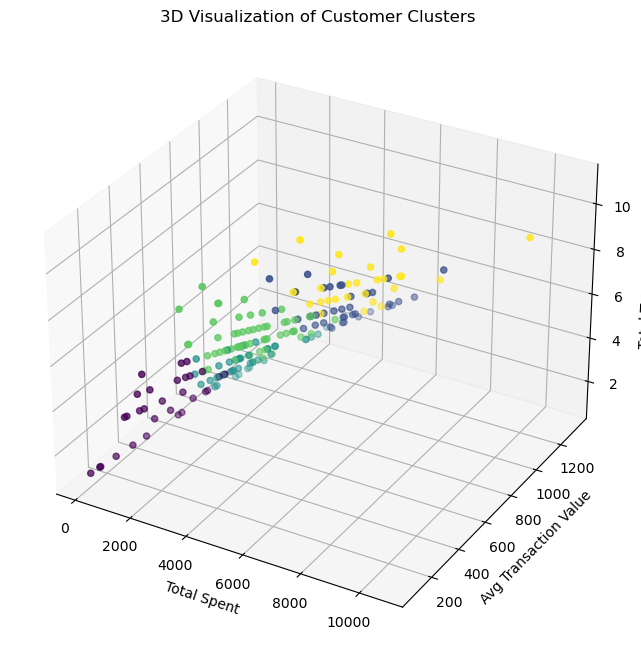

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['total_spent'], data['avg_transaction_value'], data['total_transactions'], c=data['Cluster'], cmap='viridis')
ax.set_xlabel('Total Spent')
ax.set_ylabel('Avg Transaction Value')
ax.set_zlabel('Total Transactions')
plt.title('3D Visualization of Customer Clusters')
plt.show()